In [1]:
import numpy as np
import pandas as pd
import os
import cv2
from tqdm import tqdm
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage.feature import hog
import matplotlib.image as mpimg
import random
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV

In [3]:
from util import *

# Data

In [4]:
data_dir = 'data'

## Project Video 

In [5]:
output_dir = 'output_images' 
project_video_file = 'project_video.mp4'

In [6]:
extract_video_imgs(project_video_file, output_dir)

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1245/1259 [00:25<00:00, 49.32it/s]

In [7]:
project_img_files = sorted(glob.glob('%s/*.jpg' % output_dir))[:10]
sample_project_imgs = read_imgs(project_img_files, scale_to_255=False)

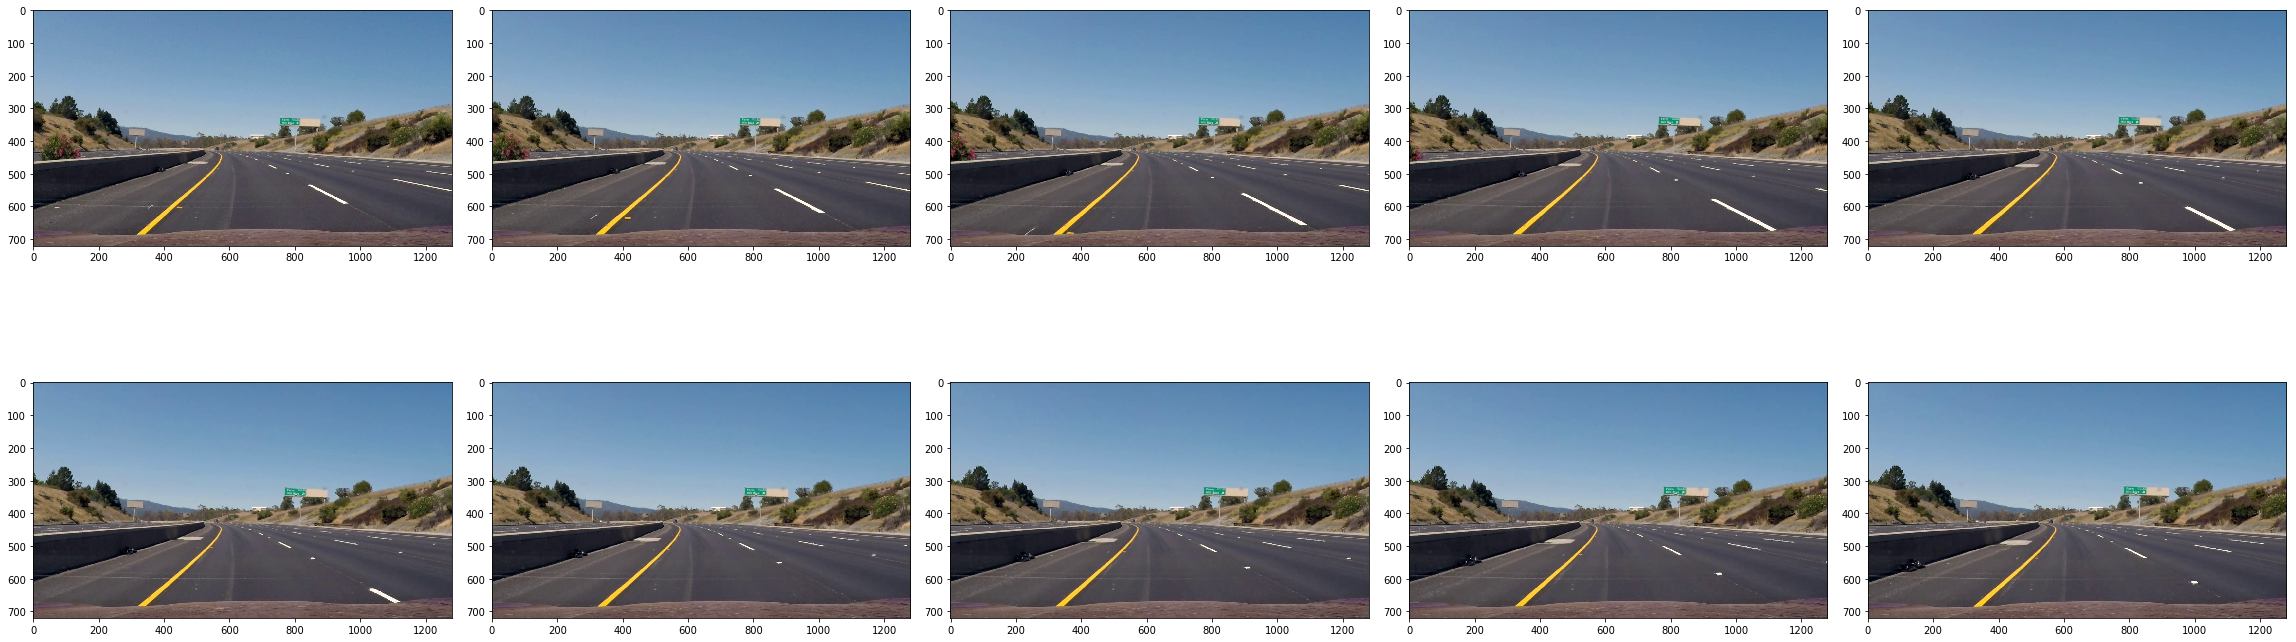

In [8]:
display_images(sample_project_imgs, figsize=(32,16))

In [9]:
sample_project_imgs.min(), sample_project_imgs.max()

(0, 255)

## Test Video

In [10]:
test_output_dir = 'test_images2' 
test_video_file = 'test_video.mp4'

In [11]:
extract_video_imgs(test_video_file, test_output_dir)


 68%|███████████████████████████████████████████████████████▍                          | 25/37 [00:00<00:00, 45.54it/s]

In [12]:
test_img_files = sorted(glob.glob('%s/*.jpg' % test_output_dir))[:10]
sample_test_imgs = read_imgs(test_img_files, scale_to_255=False)

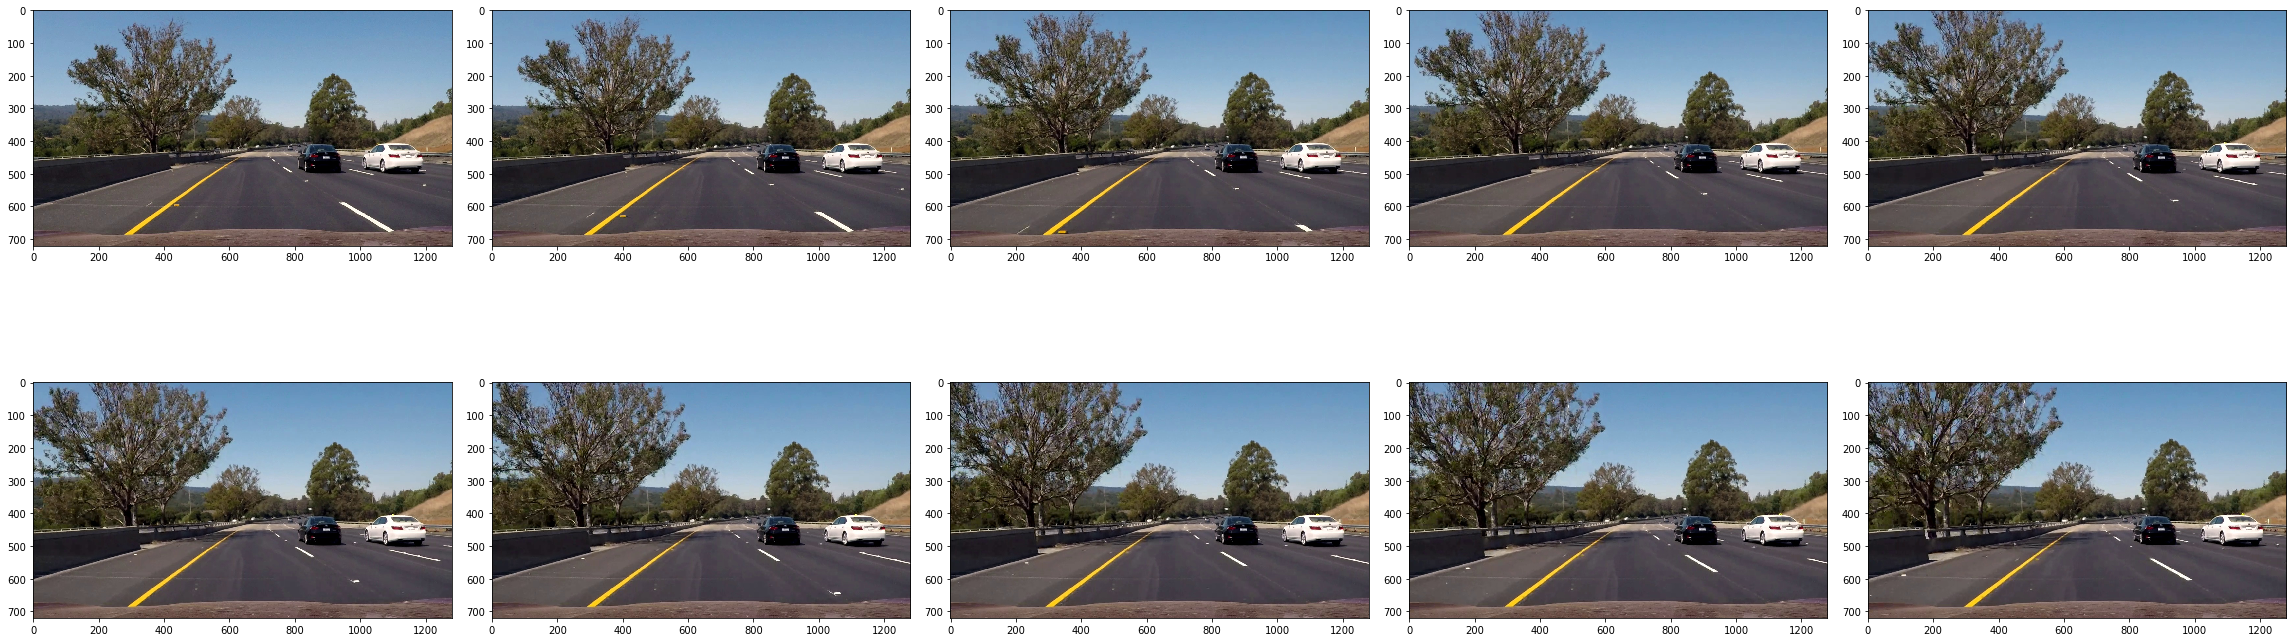

In [13]:
display_images(sample_test_imgs, figsize=(32,16))

In [14]:
sample_test_imgs.min(), sample_test_imgs.max()

(0, 255)

## Non-vehicle

### Extras

In [15]:
non_vehicle_dir = '%s/non-vehicles' % data_dir

In [16]:
non_vehicle_extra_dir = '%s/Extras' % non_vehicle_dir
non_vehicle_extra_img_files = sorted(glob.glob('%s/*.png' % non_vehicle_extra_dir))[:10]
sample_non_vehicle_extra_imgs = read_imgs(non_vehicle_extra_img_files, scale_to_255=True)

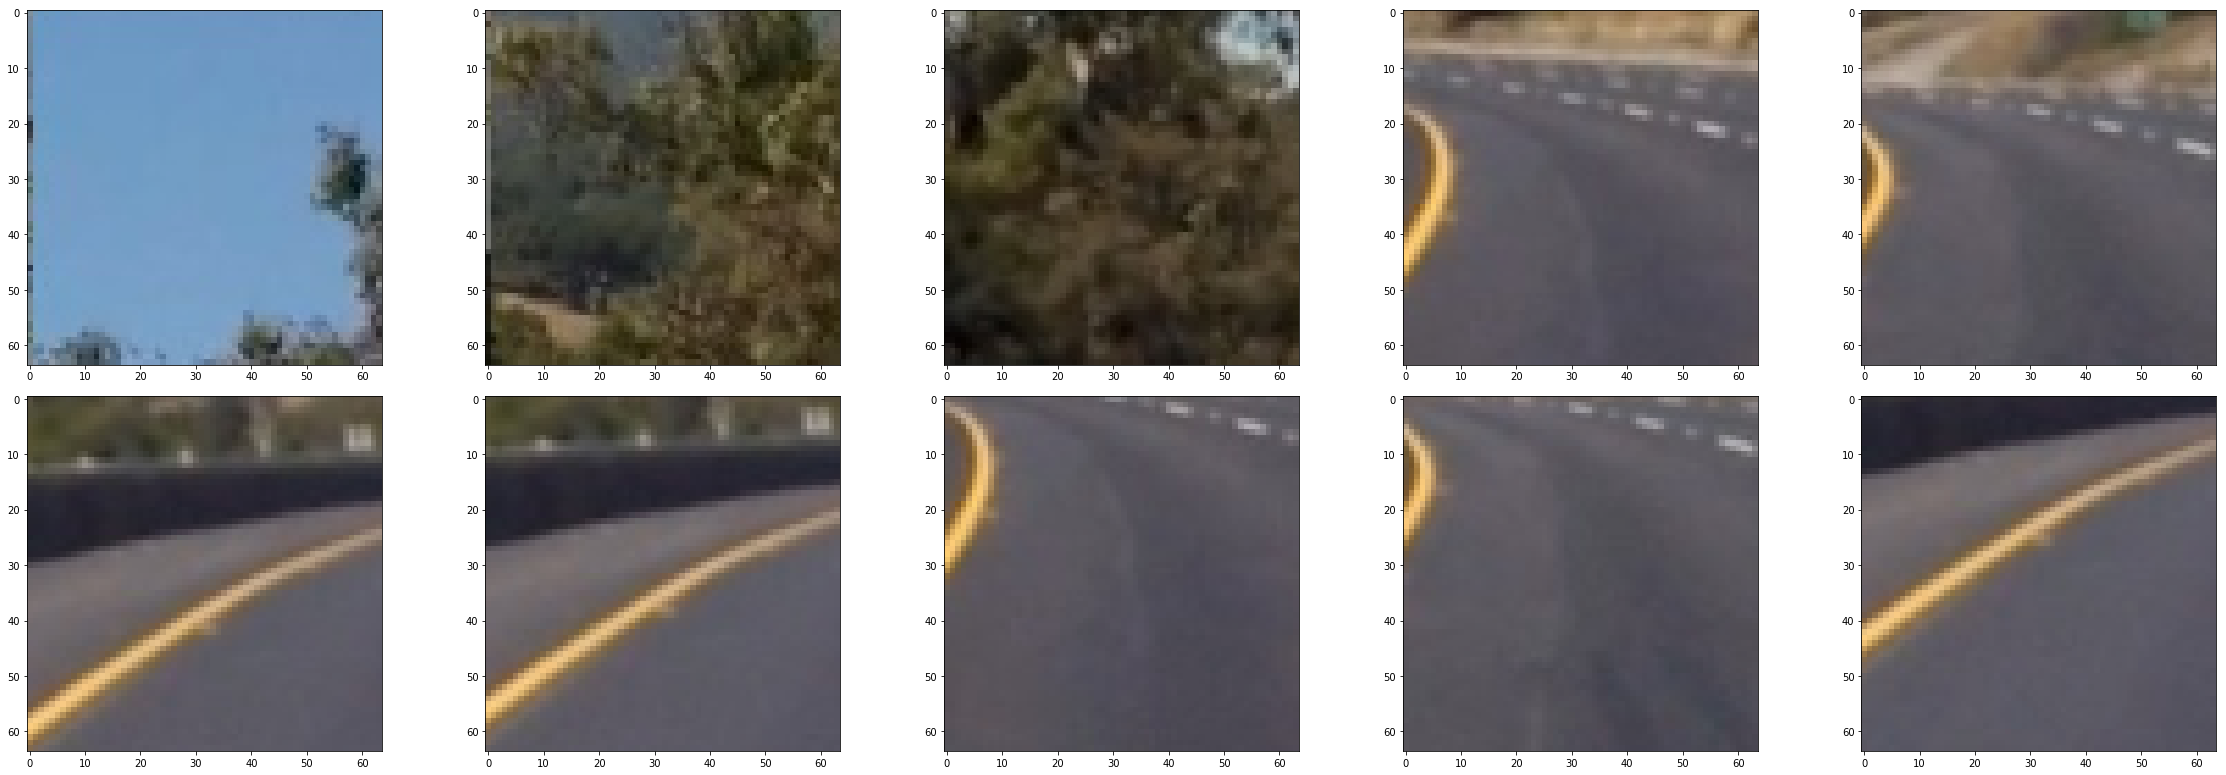

In [17]:
display_images(sample_non_vehicle_extra_imgs, figsize=(32,16))

In [18]:
sample_non_vehicle_extra_imgs[0].min(), sample_non_vehicle_extra_imgs[0].max()

(4, 207)

### GTI

In [19]:
non_vehicle_gti_dir = '%s/GTI' % non_vehicle_dir
non_vehicle_gti_img_files = sorted(glob.glob('%s/*.png' % non_vehicle_gti_dir))[:10]
sample_non_vehicle_gti_imgs = read_imgs(non_vehicle_gti_img_files, scale_to_255=True)

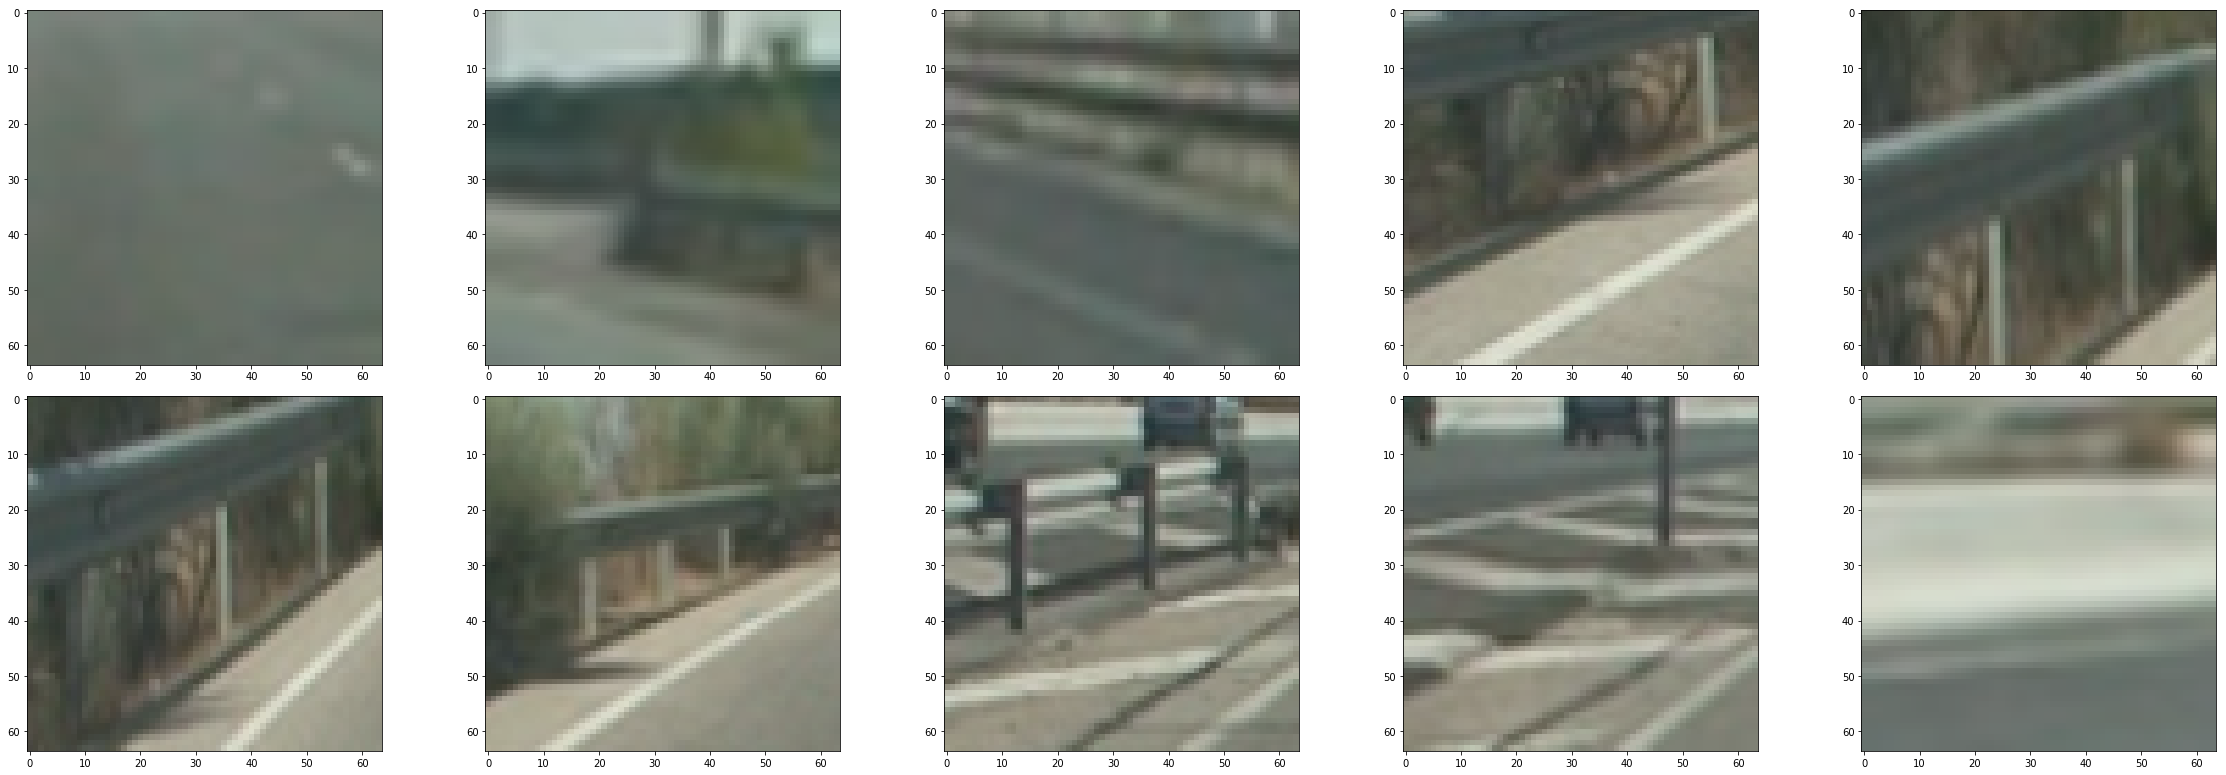

In [20]:
display_images(sample_non_vehicle_gti_imgs, figsize=(32,16))

In [21]:
sample_non_vehicle_extra_imgs[0].min(), sample_non_vehicle_extra_imgs[0].max()

(4, 207)

## Vehicle

In [22]:
vehicle_dir = '%s/vehicles' % data_dir

### GTI Far

In [23]:
vehicle_gti_far_dir = '%s/GTI_Far' % vehicle_dir
vehicle_gti_far_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_far_dir))[:10]
sample_vehicle_gti_far_imgs = read_imgs(vehicle_gti_far_img_files, scale_to_255=True)

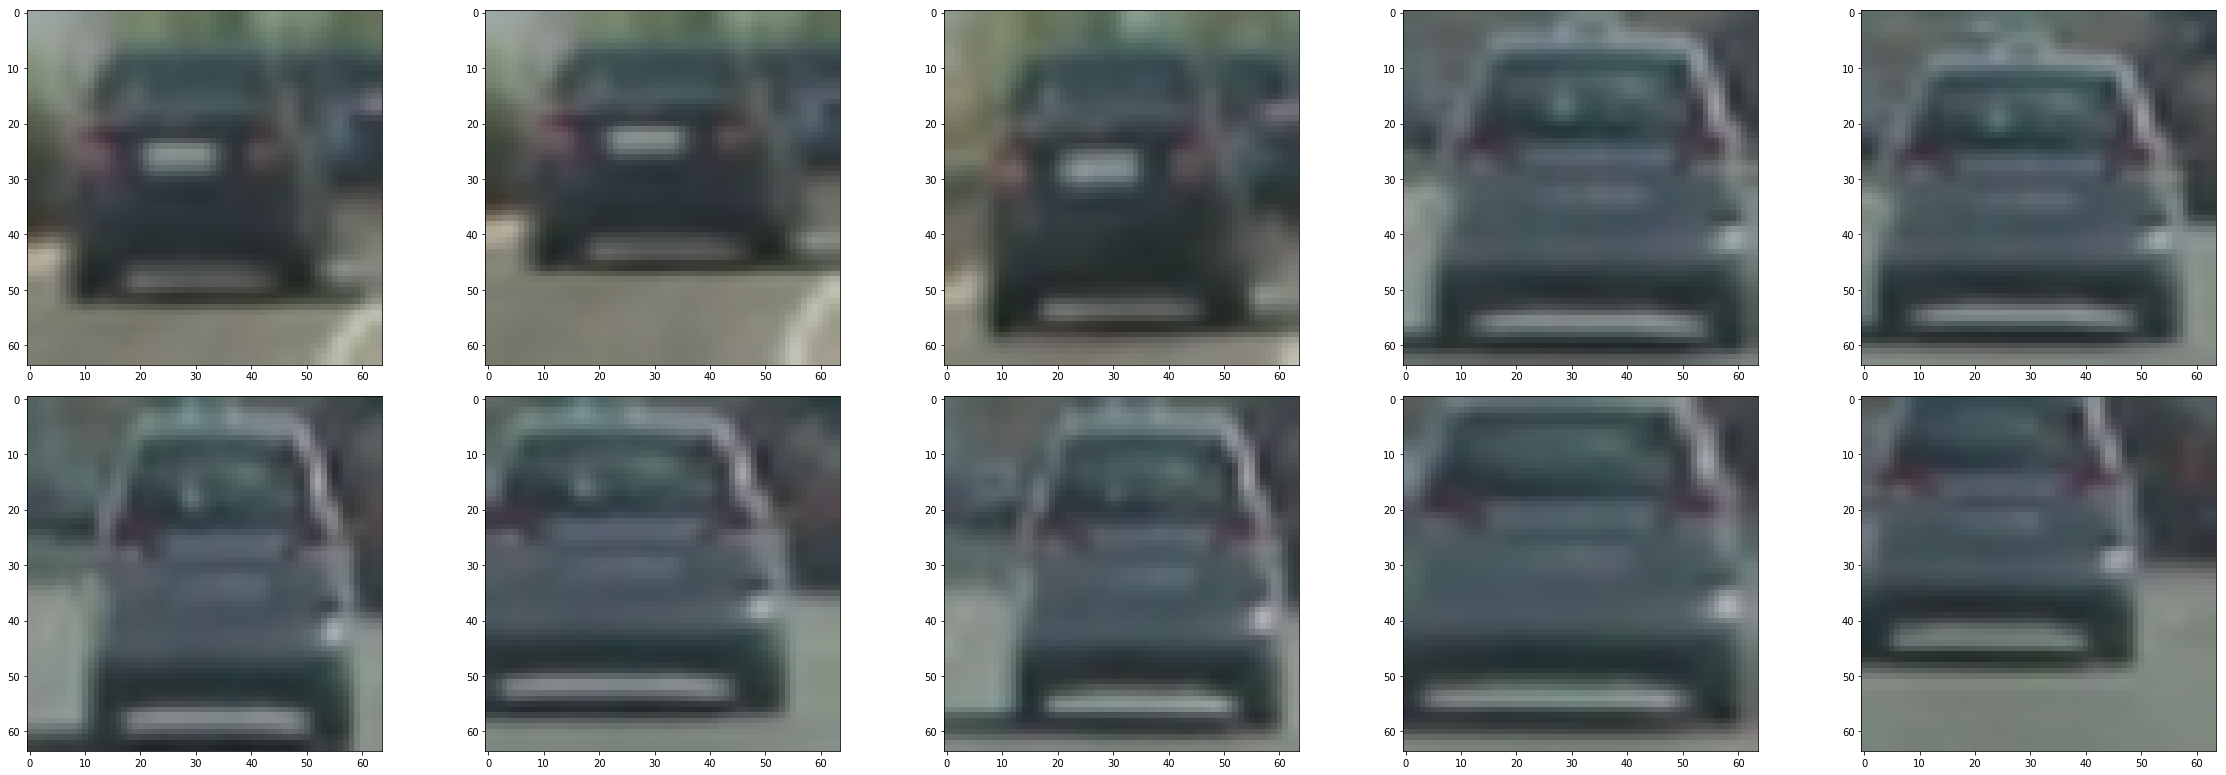

In [24]:
display_images(sample_vehicle_gti_far_imgs, figsize=(32,16))

In [25]:
sample_vehicle_gti_far_imgs[0].min(), sample_vehicle_gti_far_imgs[0].max()

(33, 192)

### GTI Left

In [26]:
vehicle_gti_left_dir = '%s/GTI_Left' % vehicle_dir
vehicle_gti_left_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_left_dir))[:10]
sample_vehicle_gti_left_imgs = read_imgs(vehicle_gti_left_img_files, scale_to_255=True)

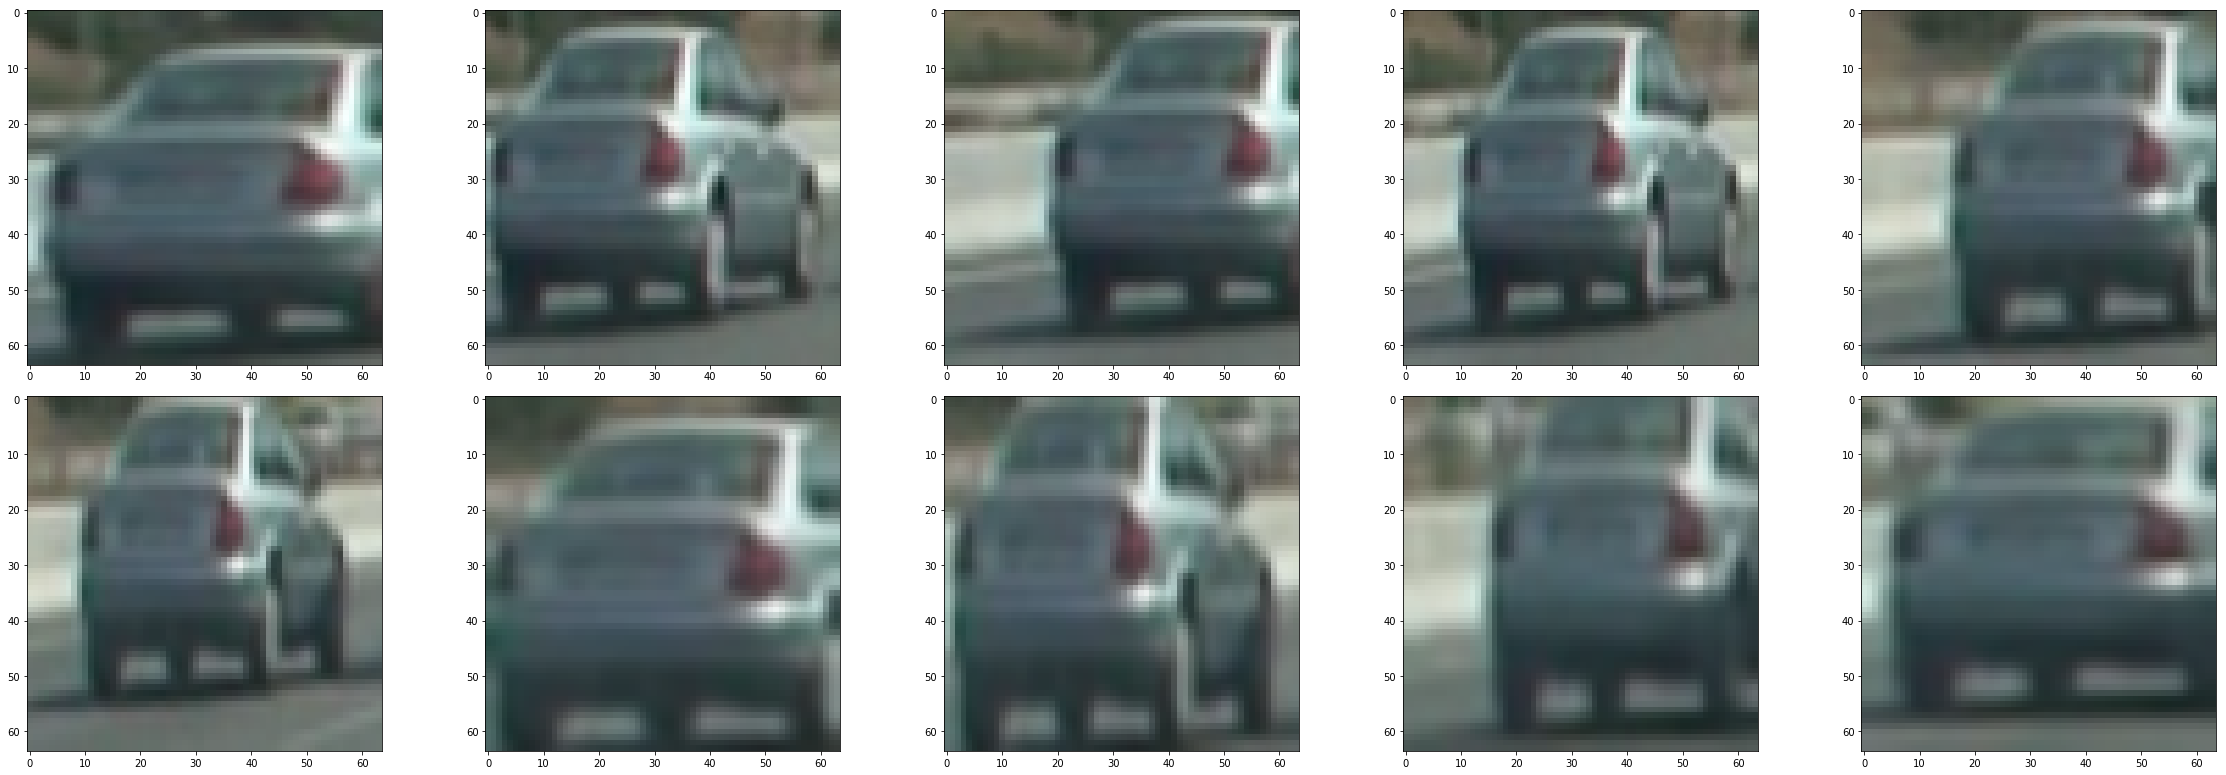

In [27]:
display_images(sample_vehicle_gti_left_imgs, figsize=(32,16))

In [28]:
sample_vehicle_gti_left_imgs[0].min(), sample_vehicle_gti_left_imgs[0].max()

(18, 255)

### GTI Middle Close

In [29]:
vehicle_gti_middle_close_dir = '%s/GTI_MiddleClose' % vehicle_dir
vehicle_gti_middle_close_img_files = sorted(glob.glob('%s/*.png' % 
                                                      vehicle_gti_middle_close_dir))[:10]
sample_vehicle_gti_middle_close_imgs = read_imgs(vehicle_gti_middle_close_img_files, 
                                                 scale_to_255=True)

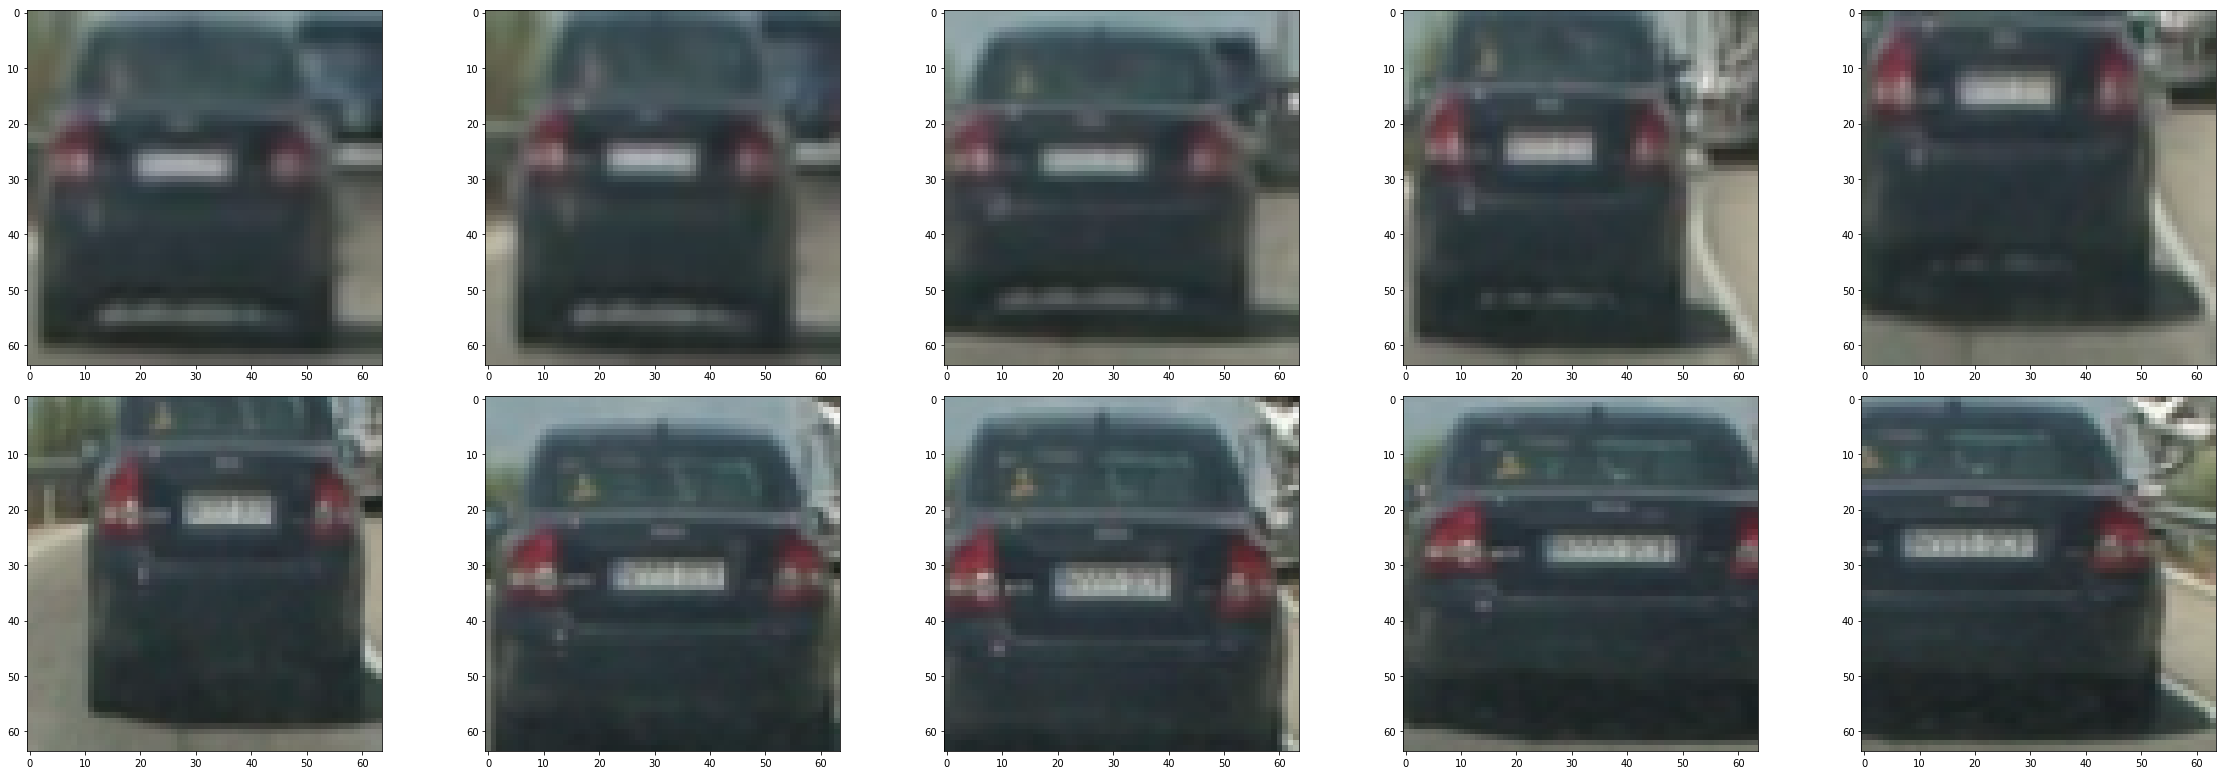

In [30]:
display_images(sample_vehicle_gti_middle_close_imgs, figsize=(32,16))

In [31]:
sample_vehicle_gti_middle_close_imgs[0].min(), sample_vehicle_gti_middle_close_imgs[0].max()

(29, 177)

### GTI Right

In [32]:
vehicle_gti_right_dir = '%s/GTI_Right' % vehicle_dir
vehicle_gti_right_img_files = sorted(glob.glob('%s/*.png' % vehicle_gti_right_dir))[:10]
sample_vehicle_gti_right_imgs = read_imgs(vehicle_gti_right_img_files, scale_to_255=True)

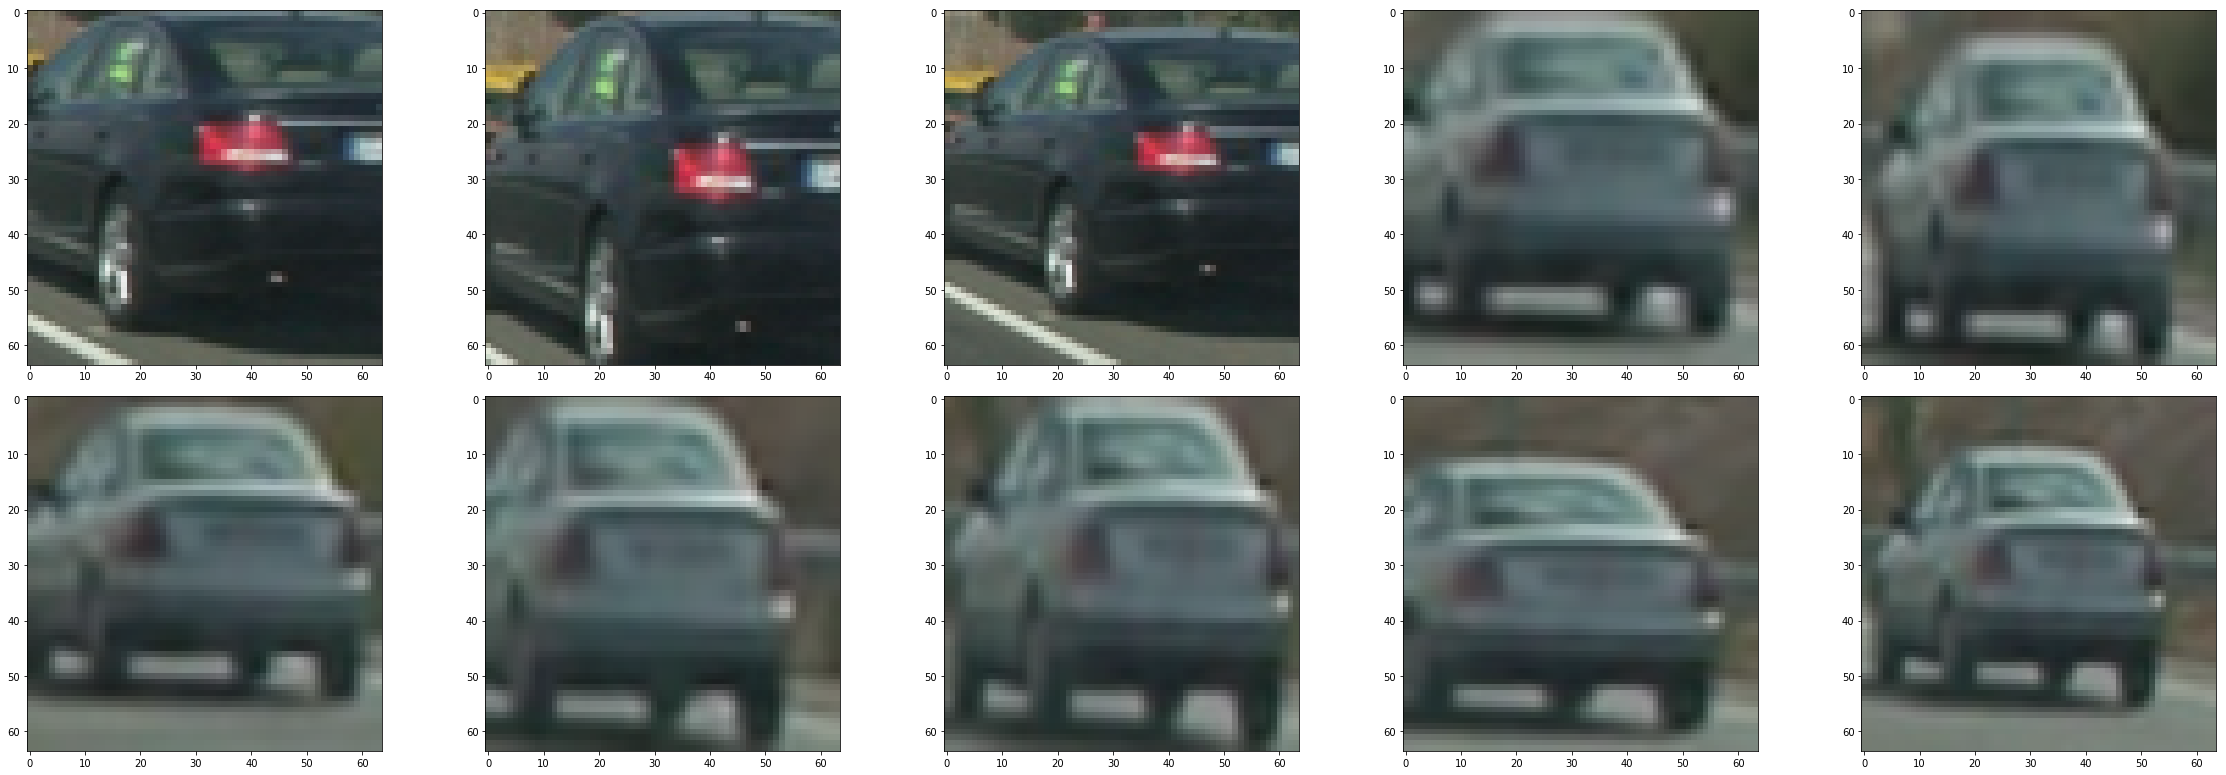

In [33]:
display_images(sample_vehicle_gti_right_imgs, figsize=(32,16))

In [34]:
sample_vehicle_gti_right_imgs[0].min(), sample_vehicle_gti_right_imgs[0].max()

(16, 238)

### KITTI extracted

In [35]:
vehicle_kitti_extracted_dir = '%s/KITTI_extracted' % vehicle_dir
vehicle_kitti_extracted_img_files = sorted(glob.glob('%s/*.png' 
                                                     % vehicle_kitti_extracted_dir))[:10]
vehicle_kitti_extracted_imgs = read_imgs(vehicle_kitti_extracted_img_files, scale_to_255=True)

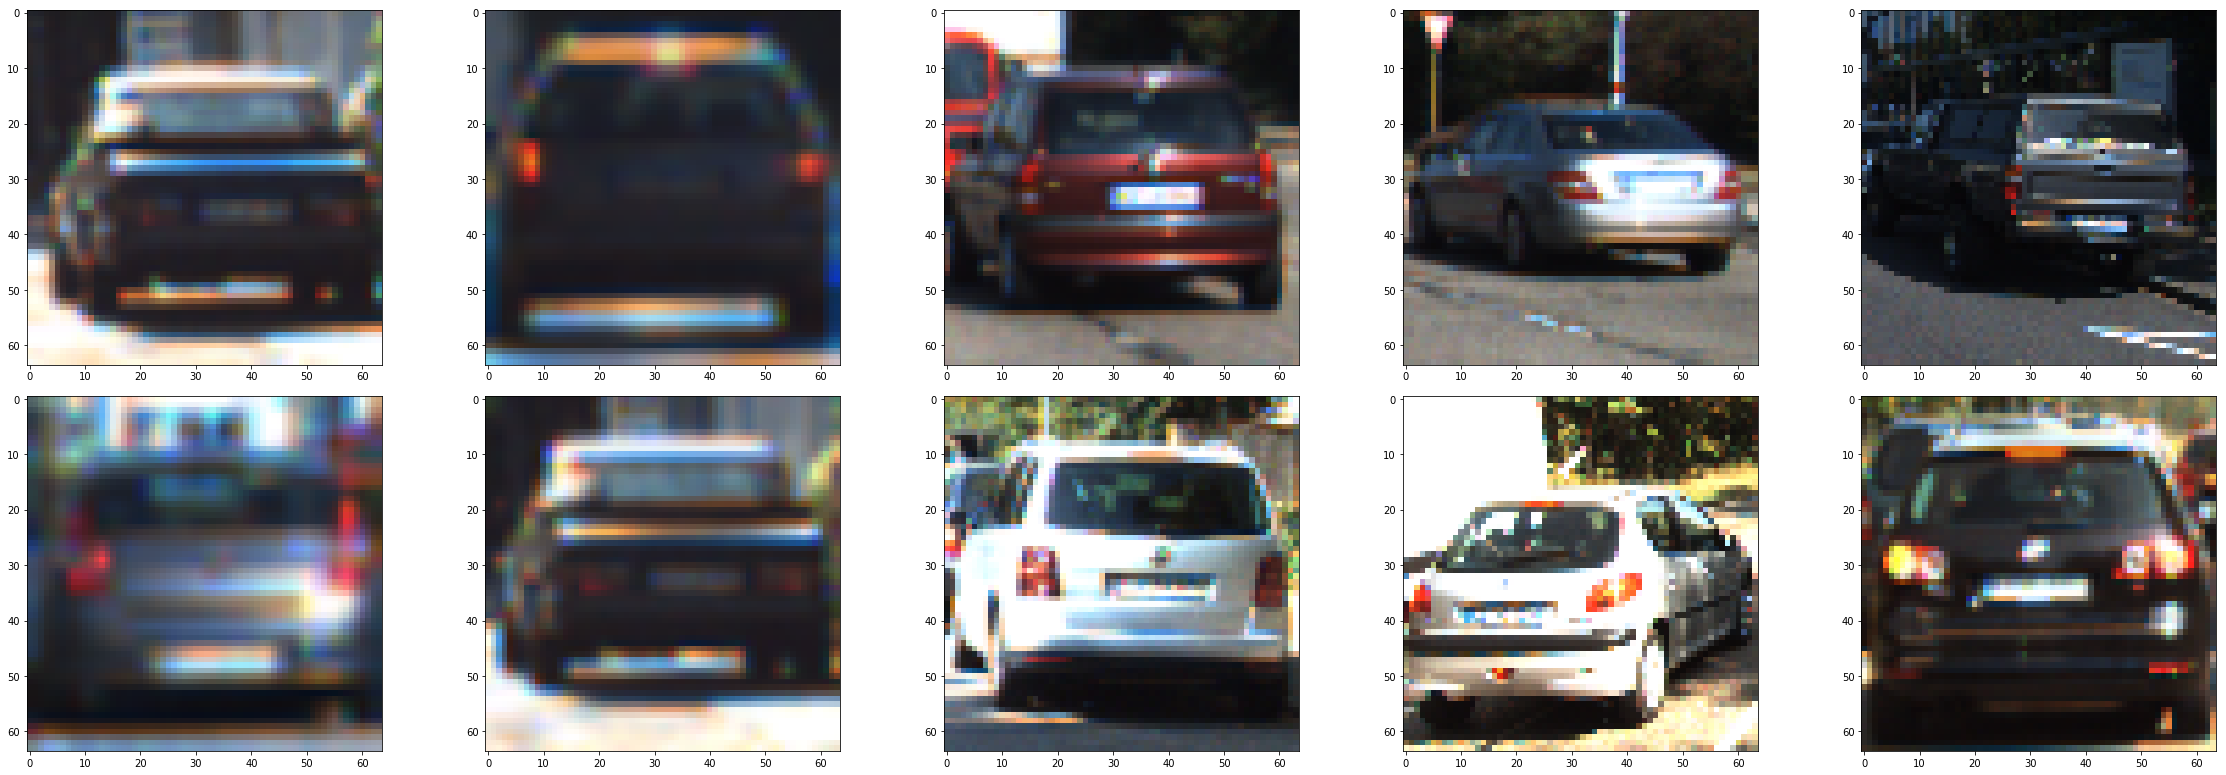

In [36]:
display_images(vehicle_kitti_extracted_imgs, figsize=(32,16))

In [37]:
vehicle_kitti_extracted_imgs[0].min(), vehicle_kitti_extracted_imgs[0].max()

(14, 255)

## Vehicle/Not Vehicle

### Vehicle

In [38]:
vehicle_dir = '%s/vehicles' % data_dir
vehicle_img_files = sorted(glob.glob('%s/*/*.png' % vehicle_dir))
vehicle_imgs = read_imgs(vehicle_img_files, scale_to_255=True)

In [39]:
len(vehicle_imgs)

8792

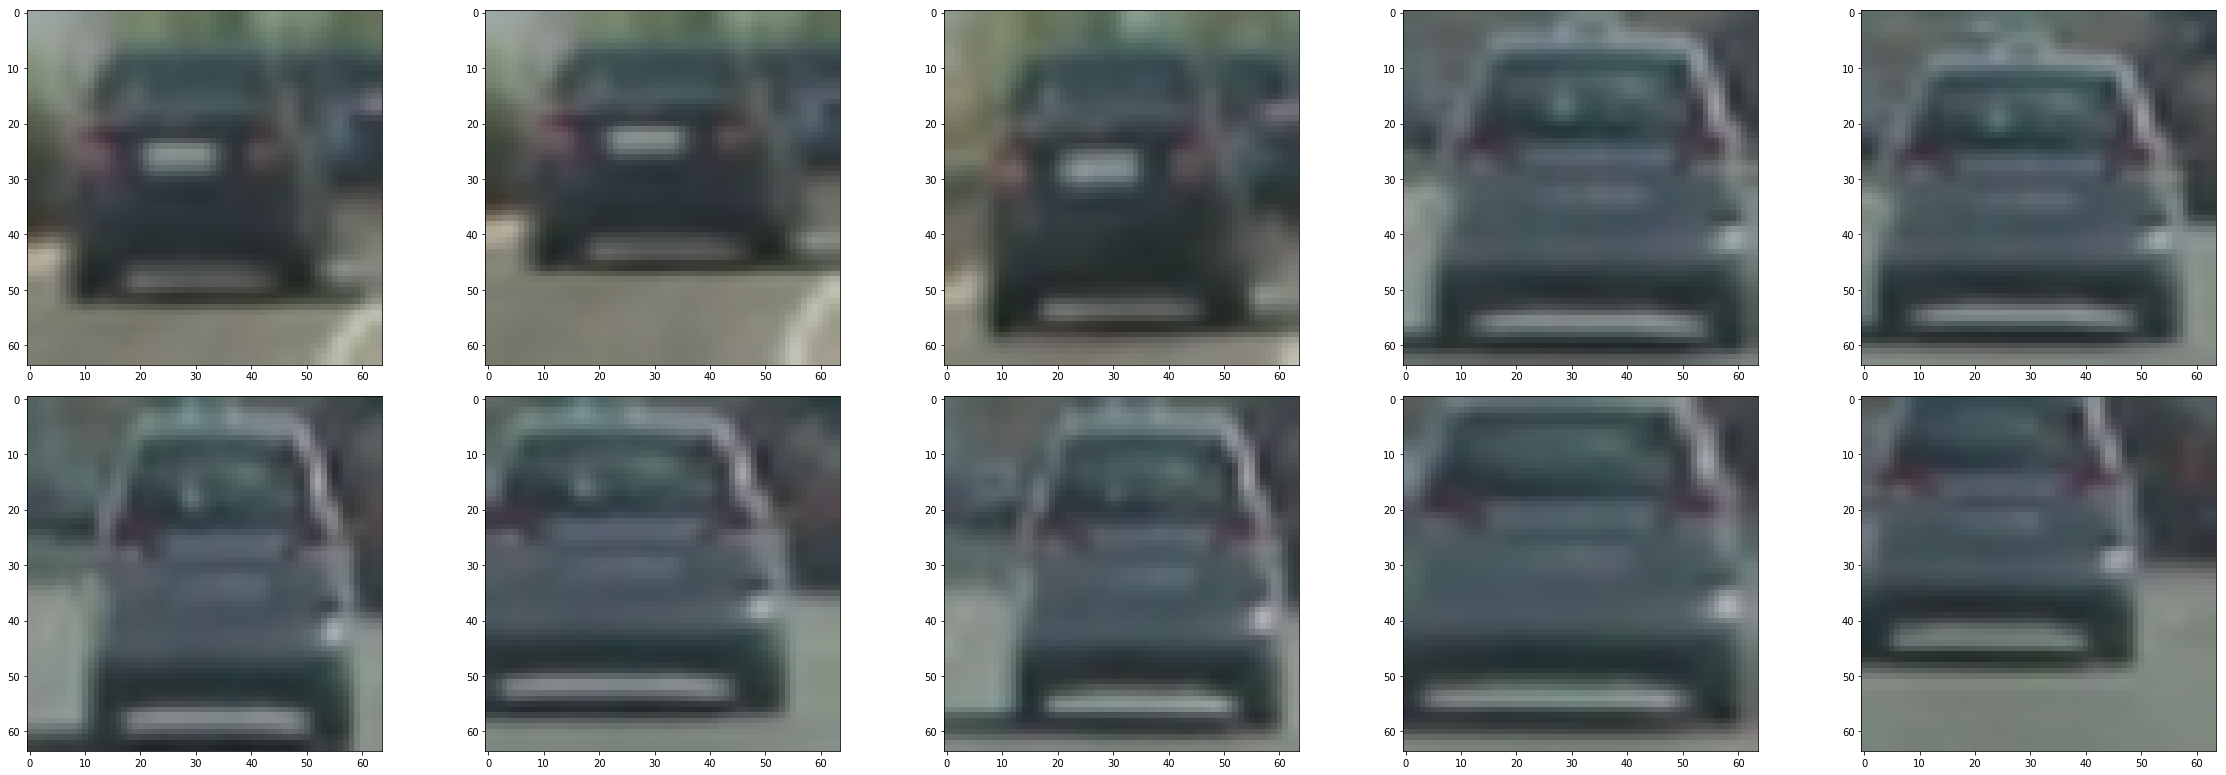

In [40]:
display_images(vehicle_imgs[:10], figsize=(32,16))

In [41]:
vehicle_imgs[0].min(), vehicle_imgs[0].max()

(33, 192)

### Non-Vehicle

In [42]:
non_vehicle_dir = '%s/non-vehicles' % data_dir
non_vehicle_img_files = sorted(glob.glob('%s/*/*.png' % non_vehicle_dir))
non_vehicle_imgs = read_imgs(non_vehicle_img_files, scale_to_255=True)

 99%|█████████████████████████████████████████████████████████████████████████████▏| 1245/1259 [00:40<00:00, 31.12it/s]

In [43]:
len(non_vehicle_imgs)

8968

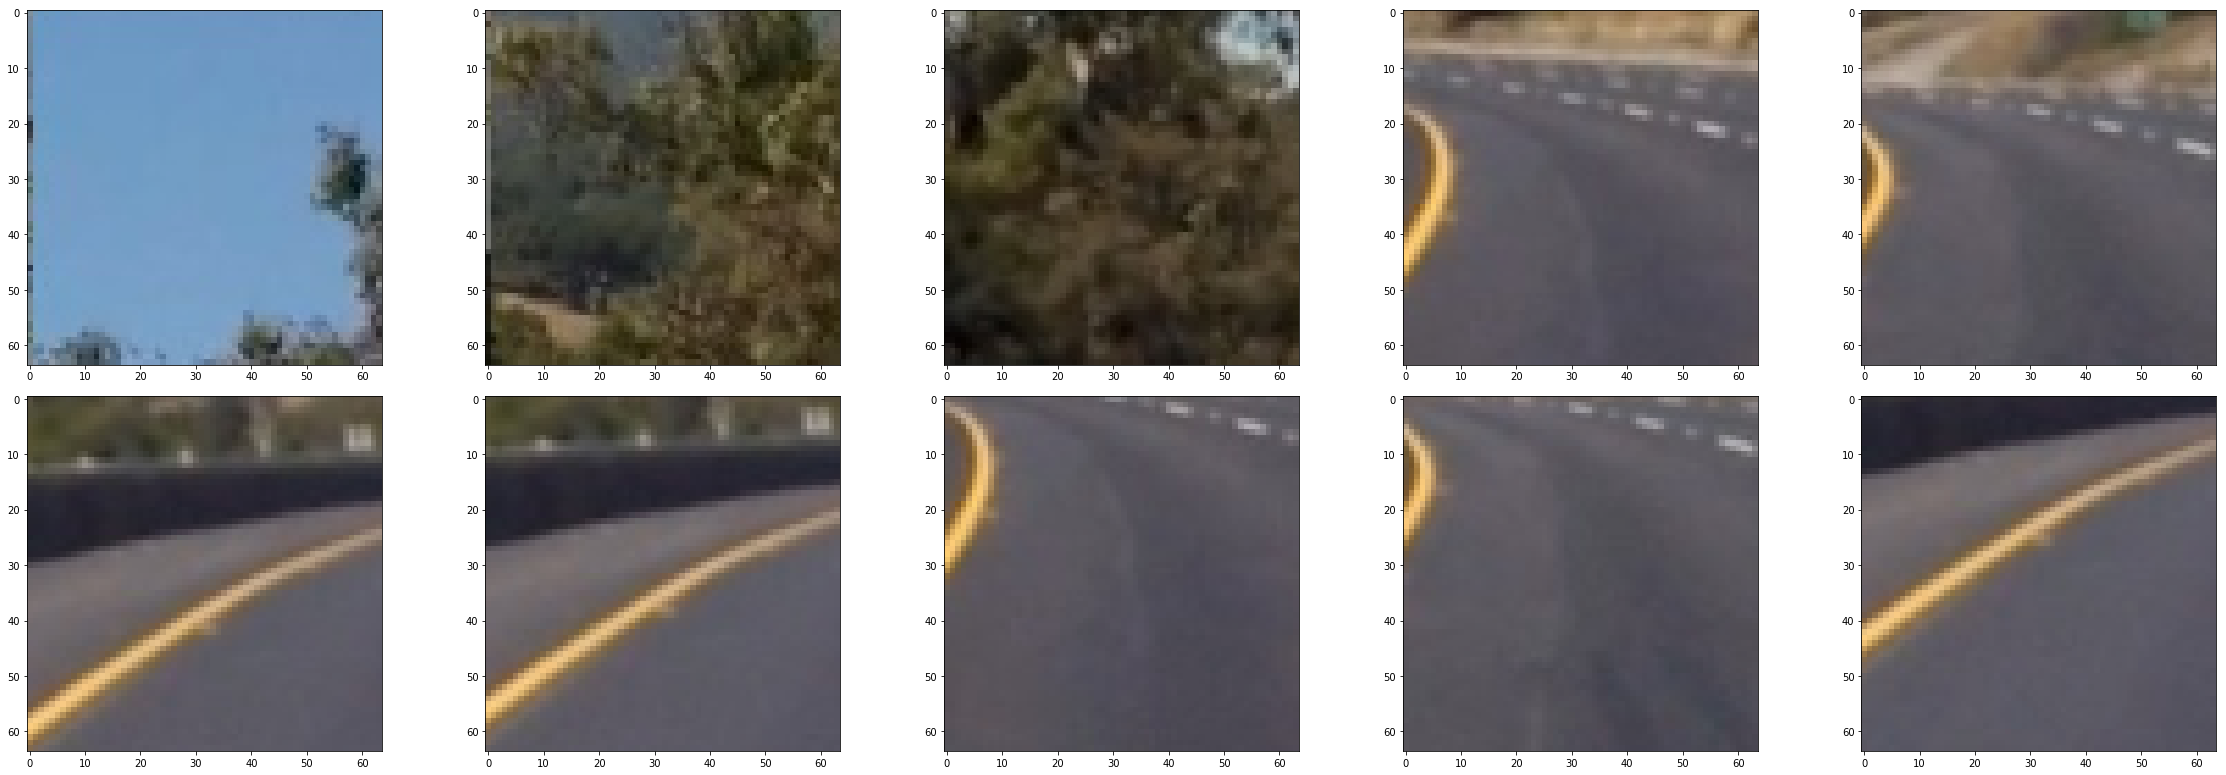

In [44]:
display_images(non_vehicle_imgs[:10], figsize=(32,16))

In [45]:
non_vehicle_imgs[0].min(), non_vehicle_imgs[0].max()

(4, 207)

## Train, Val, Test

In [46]:
X_img_files = vehicle_img_files + non_vehicle_img_files
y = [1.0]*len(vehicle_img_files) + [0.0]*len(non_vehicle_img_files)

In [47]:
X_train_imgs_filename = '%s/X_train_imgs.csv' % data_dir
X_val_imgs_filename = '%s/X_val_imgs.csv' % data_dir
X_test_imgs_filename = '%s/X_test_imgs.csv' % data_dir
y_train_filename = '%s/y_train.csv' % data_dir
y_val_filename = '%s/y_val.csv' % data_dir
y_test_filename = '%s/y_test.csv' % data_dir

In [48]:
if not do_files_exists([X_train_imgs_filename, X_val_imgs_filename, X_test_imgs_filename, 
                       y_train_filename, y_val_filename, y_test_filename]):
    X_train_img_files, X_test_img_files, y_train, y_test = train_test_split(X_img_files, y, test_size=0.3, 
                                                                            random_state=5150)
    X_val_img_files, X_test_img_files, y_val, y_test = train_test_split(X_test_img_files, y_test, test_size=0.33,
                                                                    random_state=5150)
    assert len(X_train_img_files) + len(X_val_img_files) + len(X_test_img_files) == len(X_img_files)
    assert len(y_train) + len(y_val) + len(y_test) == len(y)    
    
    save_img_file_csv(X_train_img_files, X_train_imgs_filename)
    save_img_file_csv(X_val_img_files, X_val_imgs_filename)
    save_img_file_csv(X_test_img_files, X_test_imgs_filename)
    save_label_file_csv(y_train, y_train_filename)
    save_label_file_csv(y_val, y_val_filename)
    save_label_file_csv(y_test, y_test_filename)
else:
    X_train_img_files = read_img_file_csv(X_train_imgs_filename)
    X_val_img_files = read_img_file_csv(X_val_imgs_filename)
    X_test_img_files = read_img_file_csv(X_test_imgs_filename)
    y_train = read_label_file_csv(y_train_filename)
    y_val = read_label_file_csv(y_val_filename)
    y_test = read_label_file_csv(y_test_filename)

In [49]:
X_train_vehicle_files = []
X_train_nonvehicle_files = []

for i, curr_y in enumerate(y_train):
    if curr_y == 0.0:
        X_train_nonvehicle_files.append(X_train_img_files[i])
    else:
        X_train_vehicle_files.append(X_train_img_files[i])

In [50]:
len(X_train_nonvehicle_files), len(X_train_vehicle_files)

(6251, 6181)

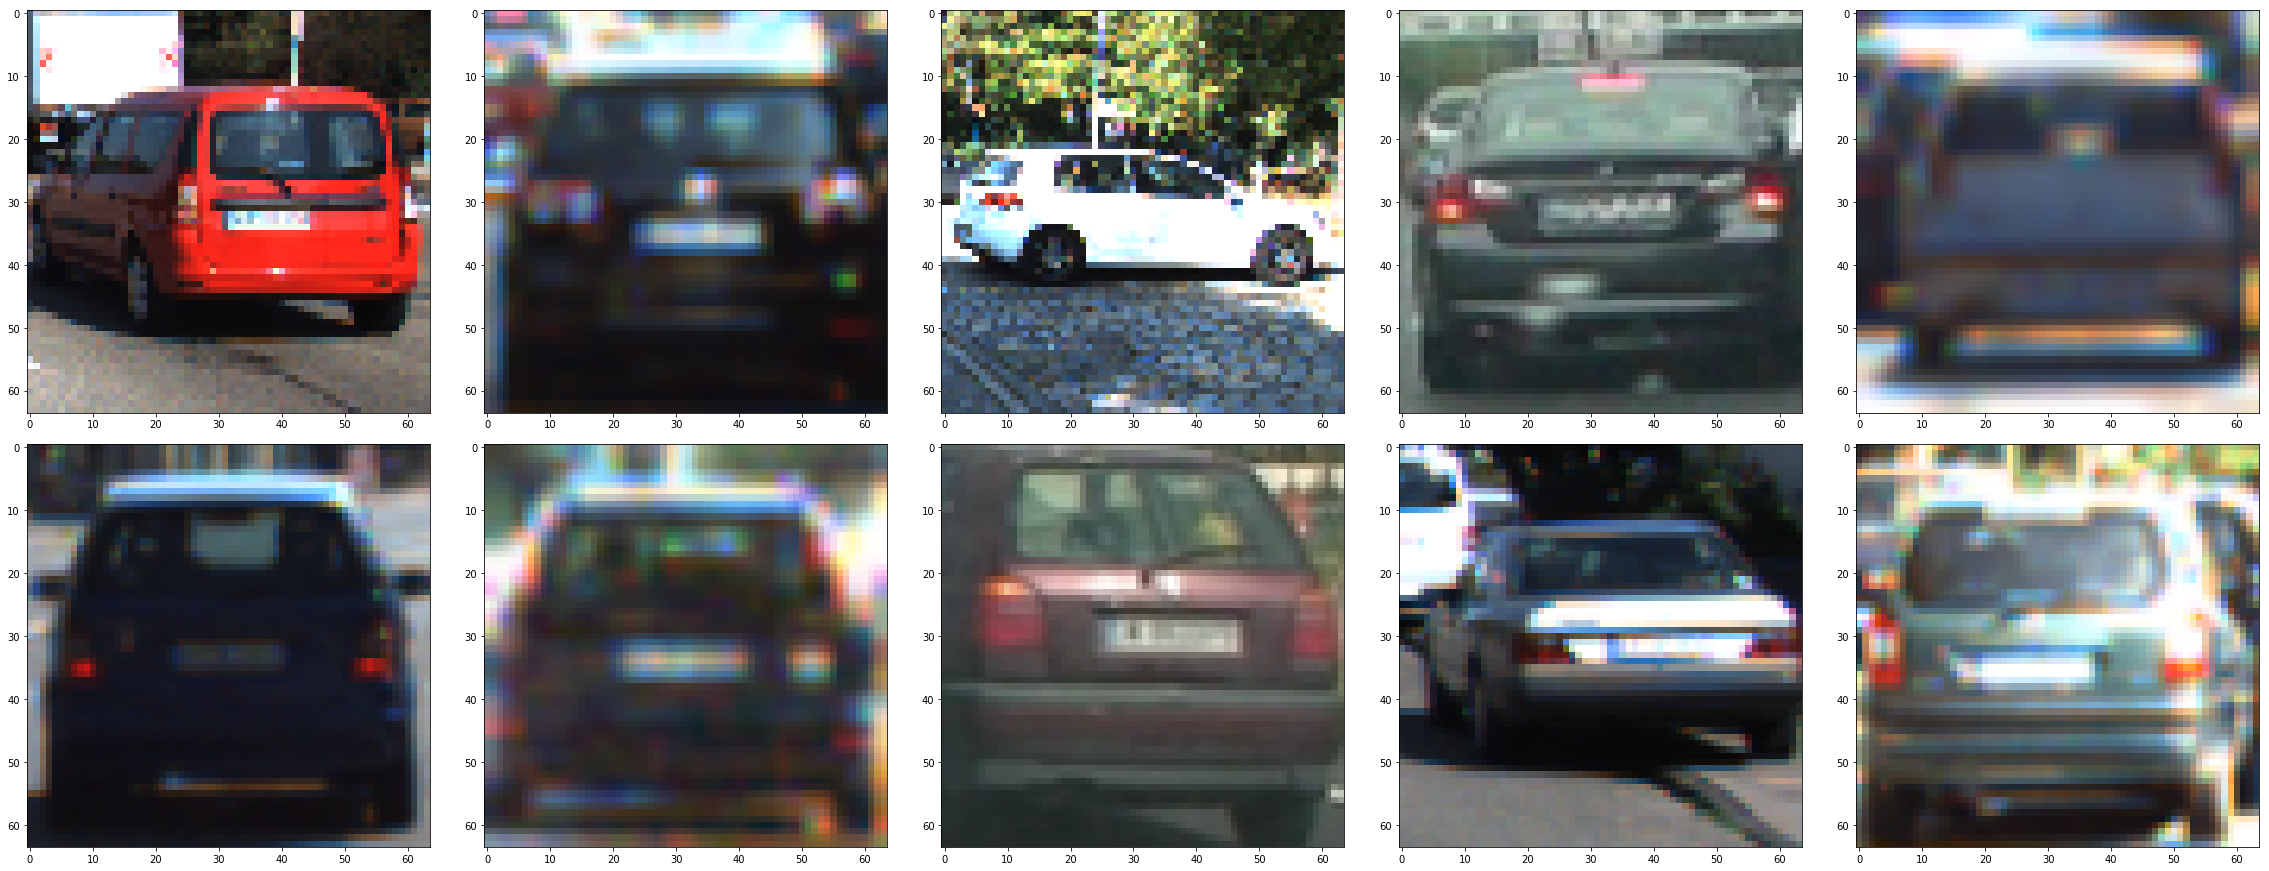

In [51]:
display_images(X_train_vehicle_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

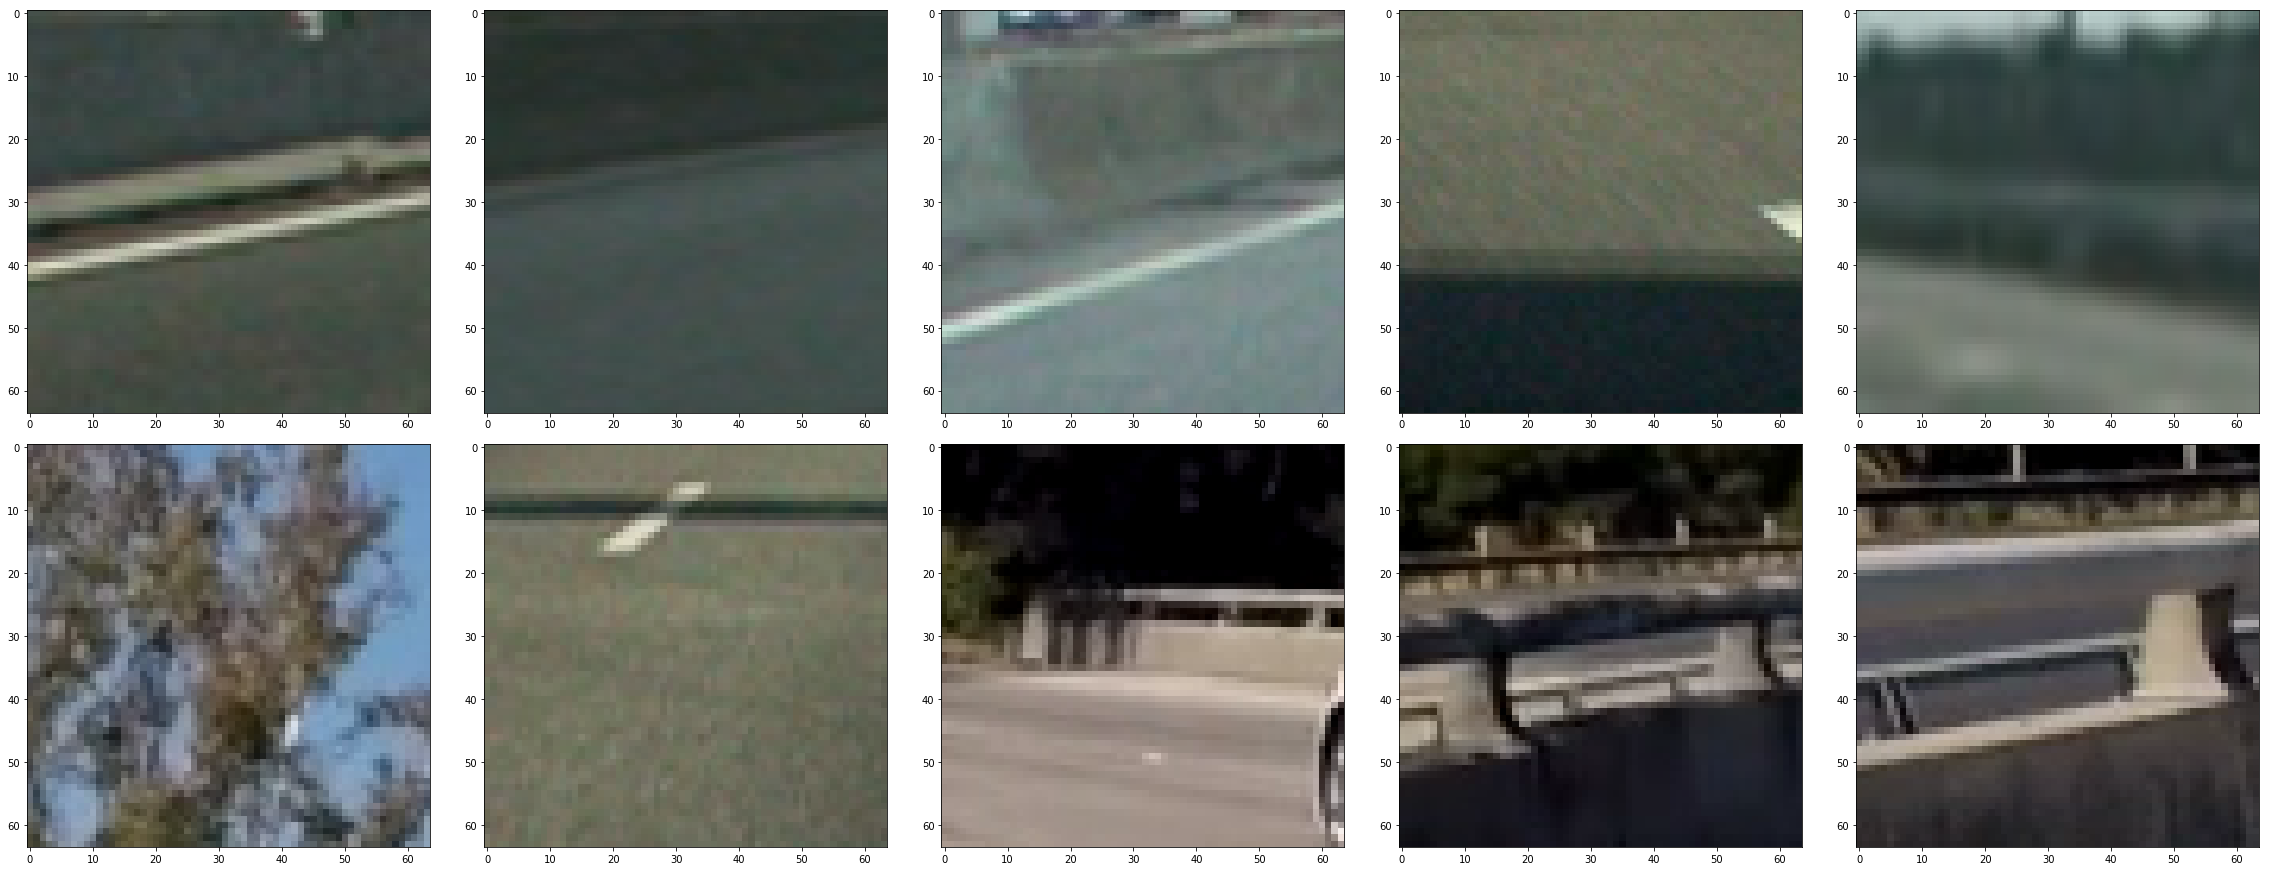

In [52]:
display_images(X_train_nonvehicle_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

# Color Histogram

In [53]:
def color_hist(img, nbins=32, bins_range=(0, 256)):
    # Compute the histogram of the color channels separately
    channel1_hist = np.histogram(img[:,:,0], bins=nbins, range=bins_range)
    channel2_hist = np.histogram(img[:,:,1], bins=nbins, range=bins_range)
    channel3_hist = np.histogram(img[:,:,2], bins=nbins, range=bins_range)
    
    # Concatenate the histograms into a single feature vector
    hist_features = np.concatenate((channel1_hist[0], channel2_hist[0], channel3_hist[0]))
    
    # Return the individual histograms, bin_centers and feature vector
    return hist_features

In [54]:
img = read_img(X_train_vehicle_files[0], scale_to_255=True)

In [55]:
feature_vec = color_hist(img, nbins=32, bins_range=(0, 256))

# Color Spaces

In [56]:
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

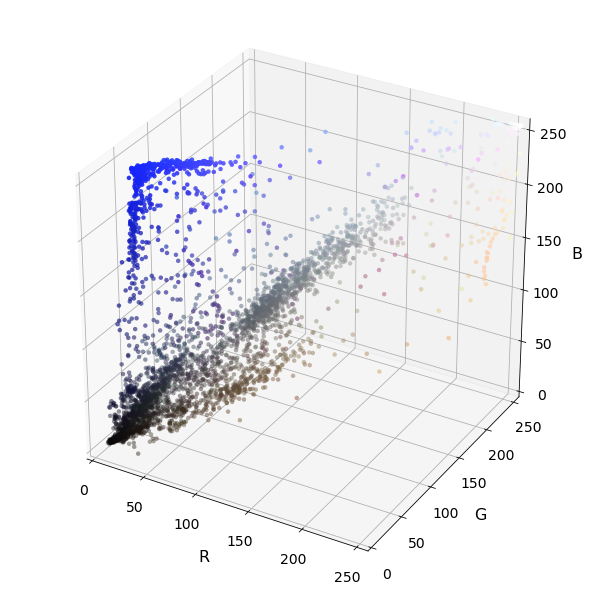

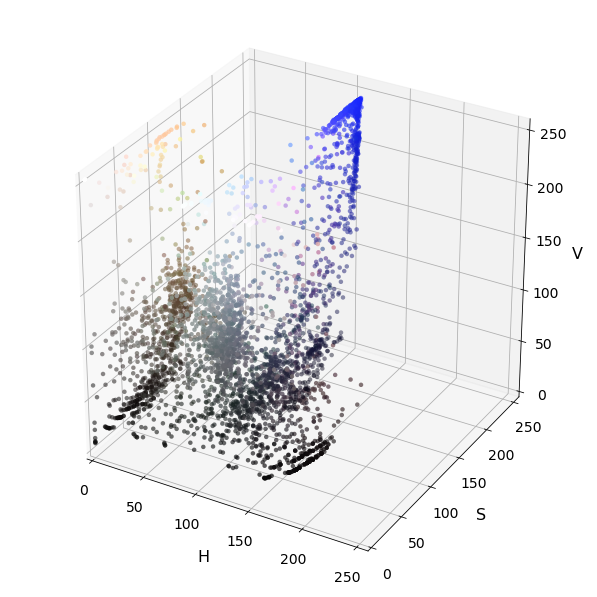

In [57]:
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting

# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()

plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

In [58]:
def bin_spatial(img, size=(32, 32)):
    # Use cv2.resize().ravel() to create the feature vector
    features = cv2.resize(img, size).ravel() 
    # Return the feature vector
    return features

# HOG

In [59]:
def get_hog_features(img, orient, pix_per_cell, cell_per_block, visualize=False):
    return hog(img, orientations=orient, pixels_per_cell=(pix_per_cell, pix_per_cell),
                   cells_per_block=(cell_per_block, cell_per_block), block_norm= 'L2-Hys',
                   transform_sqrt=True, visualise=visualize, feature_vector=True)

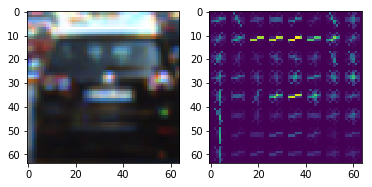

In [60]:
img = read_img(X_train_vehicle_files[1], scale_to_255=True)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Call our function with vis=True to see an image output
features, hog_img = get_hog_features(gray, orient= 9, pix_per_cell= 8, cell_per_block= 2, visualize=True)

plt.subplot(1,2,1)
plt.imshow(img)
plt.subplot(1,2,2)
plt.imshow(hog_img)
plt.show()

In [96]:
def make_scalers(img_files, cspace='RGB', hist_bins=32, hist_range=(0, 256), scale_to_255=True, 
                 hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2):
    spatial_feature_arr = []
    hist_feature_arr = []
    hog_feature_arrs = [[], [], []]
    
    for img_file in img_files:
        img = read_img(img_file, scale_to_255=scale_to_255)
        # apply color conversion if other than 'RGB'
        if cspace != 'RGB':
            if cspace == 'HSV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
            elif cspace == 'LUV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2LUV)
            elif cspace == 'HLS':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2HLS)
            elif cspace == 'YUV':
                feature_img = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)
        else: 
            feature_img = np.copy(img) 
            
        spatial_features = bin_spatial(feature_img, size=spatial_size)
        spatial_feature_arr.append(spatial_features)
        
        hist_features = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)
        hist_feature_arr.append(hist_features)
        
        for i in range(3):
            hog_features = get_hog_features(feature_img[:,:,i], orient=hog_orient, pix_per_cell=hog_pix_per_cell, 
                                            cell_per_block=hog_cell_per_block)
            hog_feature_arrs[i].append(hog_features)

    spatial_feature_scaler = StandardScaler()
    hist_feature_scaler = StandardScaler()
    hog_feature_scalers = [StandardScaler() for i in range(3)]
    
    spatial_feature_scaler.fit(np.array(spatial_feature_arr).reshape((-1,1)))
    hist_feature_scaler.fit(np.array(hist_feature_arr).reshape((-1,1)))
    for i in range(3):
        hog_feature_scalers[i].fit(np.array(hog_feature_arrs[i]).reshape((-1,1)))
    
    return spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers

In [97]:
spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers = make_scalers(X_train_img_files)

C:\Users\ekkus93\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype uint8 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\ekkus93\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [98]:
img = read_img(X_train_img_files[1], scale_to_255=True)
feature_img = np.copy(img) 

spatial_size=(32, 32)
spatial_features = bin_spatial(feature_img, size=spatial_size)

hist_bins=32
hist_range=(0, 256)
hist_features = color_hist(feature_img, nbins=hist_bins, bins_range=hist_range)

hog_orient=9
hog_pix_per_cell=8
hog_cell_per_block=2
hog_features = get_hog_features(feature_img[:,:,0], orient=hog_orient, pix_per_cell=hog_pix_per_cell, 
                                cell_per_block=hog_cell_per_block)

In [99]:
spatial_feature_scaler.mean_
scaled_spatial_features = spatial_feature_scaler.transform([spatial_features])
print(spatial_features.min(), spatial_features.max())
print(scaled_spatial_features.min(), scaled_spatial_features.max())
print(spatial_features.shape, scaled_spatial_features.shape)

37 181
-0.804908858222 1.86140079382
(3072,) (1, 3072)


In [100]:
hist_feature_scaler.mean_
scaled_hist_features = hist_feature_scaler.transform([hist_features])
print(hist_features.min(), hist_features.max())
print(scaled_hist_features.min(), scaled_hist_features.max())
print(hist_features.shape, scaled_hist_features.shape)

0 926
-0.529750196247 3.30266137973
(96,) (1, 96)


In [101]:
hog_feature_scalers[0].mean_
scaled_hog_features = hog_feature_scalers[0].transform([hog_features])
print(hog_features.min(), hog_features.max())
print(scaled_hog_features.min(), scaled_hog_features.max())
print(hog_features.shape, scaled_hog_features.shape)

0.0 2.29800577557
-0.423777074282 2.41771522907
(1764,) (1, 1764)


In [102]:
def extract_features(img_files, spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers, 
                     color_space='RGB', hist_bins=32, hist_range=(0, 256), scale_to_255=True, 
                     hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2):
    # Create a list to append feature vectors to
    features = []
    
    # Iterate through the list of images
    for img_file in img_files:
        img = read_img(img_file, scale_to_255=scale_to_255)
        
        # apply color conversion if other than 'RGB'
        if color_space != 'RGB':
            if color_space == 'HSV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
            elif color_space == 'LUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
            elif color_space == 'HLS':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
            elif color_space == 'YUV':
                feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        else: 
            feature_image = np.copy(image)  
            
        # Apply bin_spatial() to get spatial color features
        spatial_features = bin_spatial(feature_image, size=spatial_size)
        spatial_features = spatial_feature_scaler.transform([spatial_features])[0]
            
        # Apply color_hist() also with a color space option now
        hist_features = color_hist(feature_image, nbins=hist_bins, bins_range=hist_range)
        hist_features = hist_feature_scaler.transform([hist_features])[0]
        
        hog_features_arr = []
        for i in range(3):
            hog_features = get_hog_features(feature_image[:,:,i], orient=hog_orient, pix_per_cell=hog_pix_per_cell, 
                                            cell_per_block=hog_cell_per_block)
            hog_features_arr.append(hog_features)
        hog_features_np = np.concatenate(hog_features_arr)
                   
        features.append(np.concatenate((spatial_features, hist_features, hog_features_np)))
        
    # Return list of feature vectors
    return features

In [105]:
X_train = extract_features(X_train_img_files, spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers,
                           color_space='HLS', hist_bins=32, hist_range=(0, 256), 
                           scale_to_255=True, hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2)

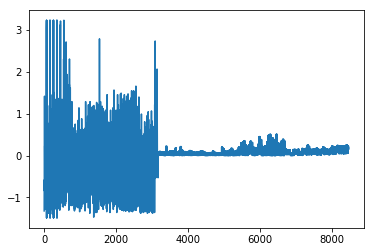

In [106]:
plt.plot(X_train[0])
plt.show()

In [107]:
X_train[0].min(), X_train[0].max(), X_train[0].mean()

(-1.4900023104813953, 3.2315876983339735, -0.063200698853310922)

# Train 

## SVM

In [108]:
parameters = {'kernel':('linear', 'rbf'), 'C':list(range(1,10,3))}
n_jobs = 8

svr = svm.SVC()
clf = GridSearchCV(svr, parameters, verbose=2, n_jobs=n_jobs)

In [109]:
X_train_img_files, y_train = shuffle_train_data(X_train_img_files, y_train)

In [110]:
X_train = extract_features(X_train_img_files, spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers,
                           color_space='HLS', hist_bins=32, hist_range=(0, 256), 
                           scale_to_255=True, hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2)

In [111]:
num_of_samples = int(0.1*len(y_train))
_X_train = X_train[:num_of_samples]
_y_train = y_train[:num_of_samples]

In [112]:
y_train[:10]

[1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0]

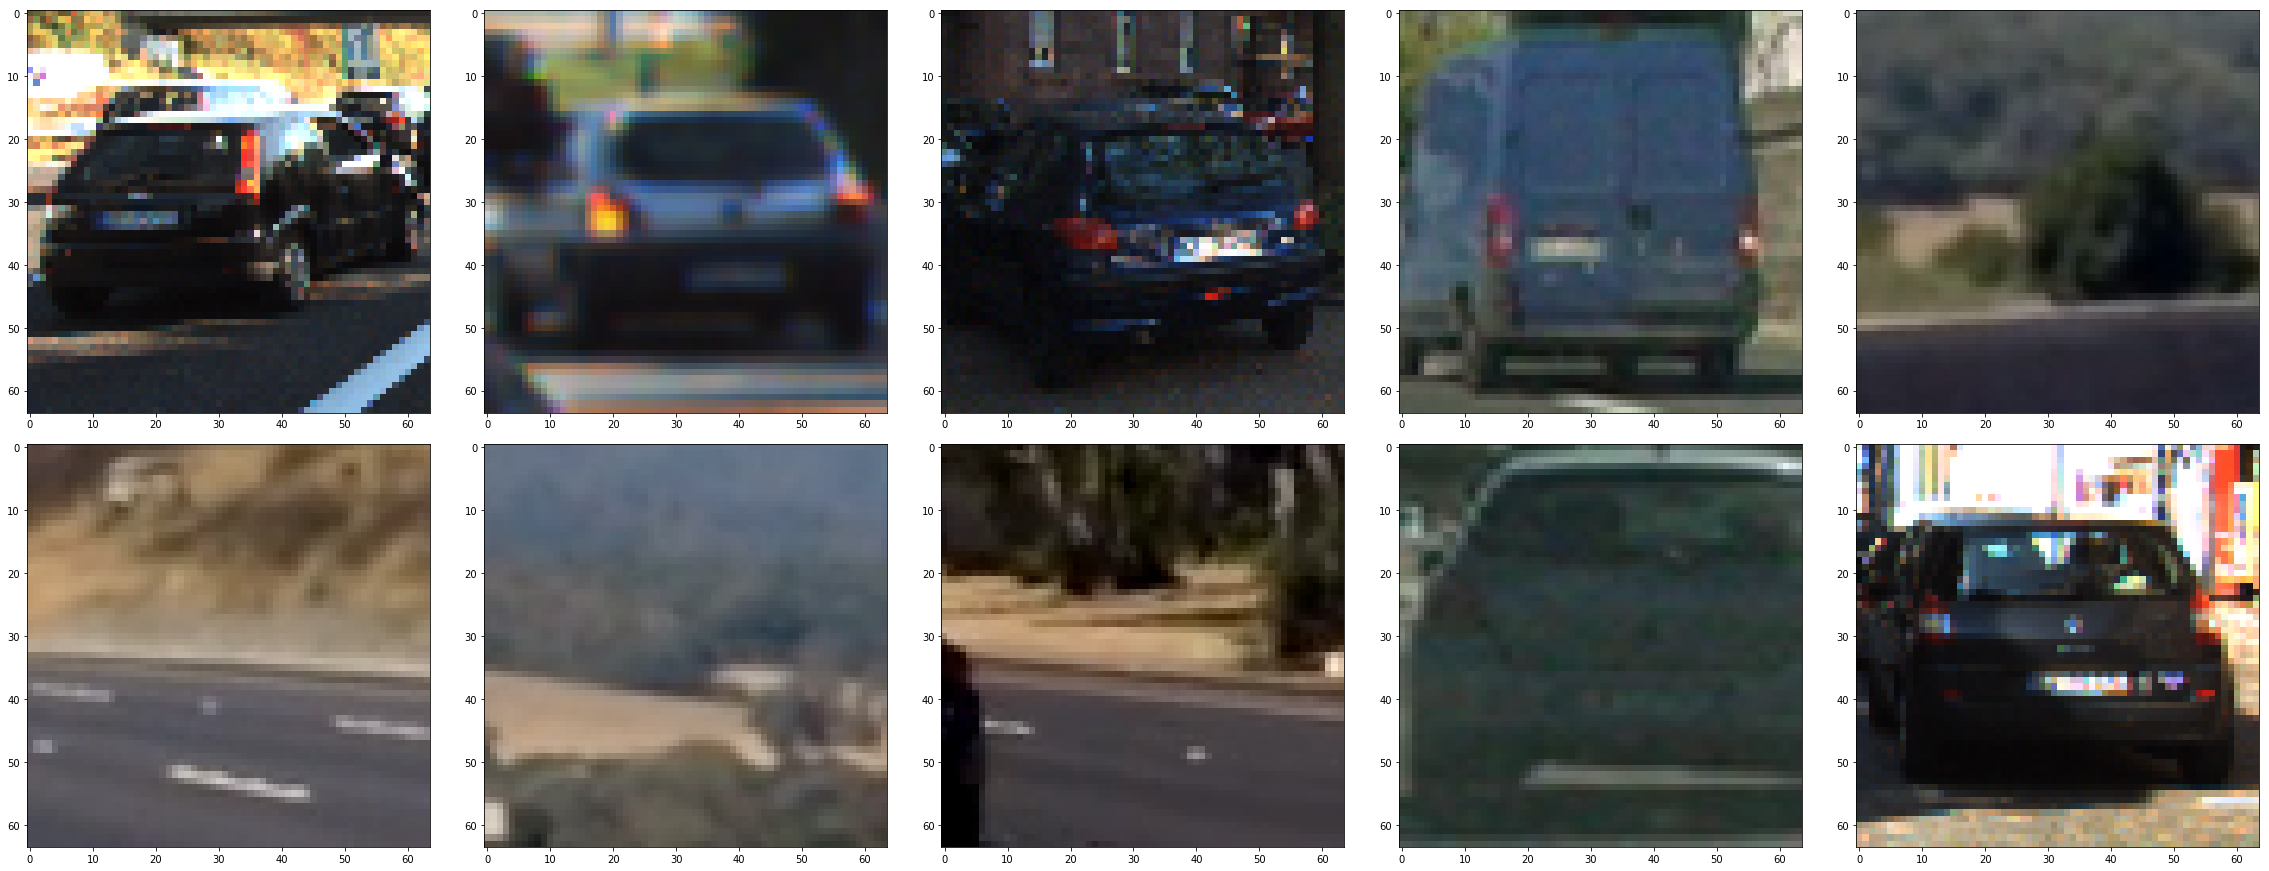

In [113]:
display_images(X_train_img_files, start_idx=0, end_idx=10,  step_val=1,
                   columns = 5, use_gray=False,
                   apply_fnc=lambda x: read_img(x, scale_to_255=True), figsize=(32,18))

In [114]:
clf.fit(_X_train, _y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=8)]: Done  13 out of  18 | elapsed:   17.1s remaining:    6.5s
[Parallel(n_jobs=8)]: Done  18 out of  18 | elapsed:   19.9s finished


GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=8,
       param_grid={'kernel': ('linear', 'rbf'), 'C': [1, 4, 7]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=2)

In [115]:
clf.best_estimator_

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [116]:
clf.cv_results_ 

C:\Users\ekkus93\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ekkus93\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ekkus93\AppData\Local\conda\conda\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=Tru

{'mean_fit_time': array([ 1.79933461,  3.27866713,  2.83666722,  3.20666655,  2.87900162,
         2.97766725]),
 'mean_score_time': array([ 1.17599996,  1.85000094,  1.24833306,  1.66000175,  1.19199904,
         1.16199994]),
 'mean_test_score': array([ 0.96299276,  0.96138375,  0.96299276,  0.9694288 ,  0.96299276,
         0.96781979]),
 'mean_train_score': array([ 1.        ,  0.98310636,  1.        ,  0.99919582,  1.        ,  1.        ]),
 'param_C': masked_array(data = [1 1 4 4 7 7],
              mask = [False False False False False False],
        fill_value = ?),
 'param_kernel': masked_array(data = ['linear' 'rbf' 'linear' 'rbf' 'linear' 'rbf'],
              mask = [False False False False False False],
        fill_value = ?),
 'params': [{'C': 1, 'kernel': 'linear'},
  {'C': 1, 'kernel': 'rbf'},
  {'C': 4, 'kernel': 'linear'},
  {'C': 4, 'kernel': 'rbf'},
  {'C': 7, 'kernel': 'linear'},
  {'C': 7, 'kernel': 'rbf'}],
 'rank_test_score': array([3, 6, 3, 1, 3, 2]),
 'spli

In [117]:
clf.best_params_

{'C': 4, 'kernel': 'rbf'}

In [119]:
X_val = extract_features(X_val_img_files, spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers,
                           color_space='HLS', hist_bins=32, hist_range=(0, 256), 
                           scale_to_255=True, hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2)

In [120]:
X_test = extract_features(X_test_img_files, spatial_feature_scaler, hist_feature_scaler, hog_feature_scalers,
                           color_space='HLS', hist_bins=32, hist_range=(0, 256), 
                           scale_to_255=True, hog_orient=9, hog_pix_per_cell=8, hog_cell_per_block=2)

In [121]:
type(X_test), type(y_test)

(list, list)

In [122]:
clf.score(X_val, y_val)

0.98346875875595408

In [123]:
clf.score(X_test, y_test)

0.97839681637293918

## Use best setting to fully train svm model

In [124]:
best_clf = svm.SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
                   decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
                   max_iter=-1, probability=False, random_state=None, shrinking=True,
                   tol=0.001, verbose=False)

In [125]:
best_clf.fit(X_train, y_train)

SVC(C=4, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [126]:
best_clf.score(X_val, y_val)

0.99383580834967777

In [127]:
best_clf.score(X_test, y_test)

0.99317794201250709

In [128]:
from sklearn.externals import joblib

In [129]:
best_svm_file = '%s/best_svm.pkl' % data_dir

In [130]:
joblib.dump(best_clf, best_svm_file) 

['data/best_svm.pkl']

In [131]:
_best_clf = joblib.load(best_svm_file) 

# Search and Classify

In [ ]:
def slide_window(img, x_start_stop=[None, None], y_start_stop=[None, None], 
                    xy_window=(64, 64), xy_overlap=(0.5, 0.5)):
    # If x and/or y start/stop positions not defined, set to image size
    if x_start_stop[0] == None:
        x_start_stop[0] = 0
    if x_start_stop[1] == None:
        x_start_stop[1] = img.shape[1]
    if y_start_stop[0] == None:
        y_start_stop[0] = 0
    if y_start_stop[1] == None:
        y_start_stop[1] = img.shape[0]
        
    # Compute the span of the region to be searched    
    xspan = x_start_stop[1] - x_start_stop[0]
    yspan = y_start_stop[1] - y_start_stop[0]
    
    # Compute the number of pixels per step in x/y
    nx_pix_per_step = np.int(xy_window[0]*(1 - xy_overlap[0]))
    ny_pix_per_step = np.int(xy_window[1]*(1 - xy_overlap[1]))
    
    # Compute the number of windows in x/y
    nx_buffer = np.int(xy_window[0]*(xy_overlap[0]))
    ny_buffer = np.int(xy_window[1]*(xy_overlap[1]))
    nx_windows = np.int((xspan-nx_buffer)/nx_pix_per_step) 
    ny_windows = np.int((yspan-ny_buffer)/ny_pix_per_step) 
    
    # Initialize a list to append window positions to
    window_list = []
    
    # Loop through finding x and y window positions
    # Note: you could vectorize this step, but in practice
    # you'll be considering windows one by one with your
    # classifier, so looping makes sense
    for ys in range(ny_windows):
        for xs in range(nx_windows):
            # Calculate window position
            startx = xs*nx_pix_per_step + x_start_stop[0]
            endx = startx + xy_window[0]
            starty = ys*ny_pix_per_step + y_start_stop[0]
            endy = starty + xy_window[1]
            
            # Append window position to list
            window_list.append(((startx, starty), (endx, endy)))
            
    # Return the list of windows
    return window_list

In [ ]:
def draw_boxes(img, bboxes, color=(0, 0, 255), thick=6):
    # Make a copy of the image
    imcopy = np.copy(img)
    
    # Iterate through the bounding boxes
    for bbox in bboxes:
        # Draw a rectangle given bbox coordinates
        cv2.rectangle(imcopy, bbox[0], bbox[1], color, thick)
        
    # Return the image copy with boxes drawn
    return imcopy

In [ ]:
# Define a function to extract features from a single image window
# This function is very similar to extract_features()
# just for a single image rather than list of images
def single_img_features(img, hist_feature_scaler, hog_feature_scaler, color_space='RGB',hist_bins=32, orient=9, 
                        pix_per_cell=8, cell_per_block=2, hog_channel=0):    
    #1) Define an empty list to receive features
    img_features = []
    #2) Apply color conversion if other than 'RGB'
    if color_space != 'RGB':
        if color_space == 'HSV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == 'LUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2LUV)
        elif color_space == 'HLS':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2HLS)
        elif color_space == 'YUV':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
        elif color_space == 'YCrCb':
            feature_image = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
    else: 
        feature_image = np.copy(img)      
        
    hist_features = color_hist(feature_image, nbins=hist_bins)
    img_features.append(hist_features)
        
    gray = cv2.cvtColor(feature_img, cv2.COLOR_RGB2GRAY)
    hog_features = get_hog_features(gray, orient=hog_orient, pix_per_cell=hog_pix_per_cell, 
                                        cell_per_block=hog_cell_per_block)
    img_features.append(hog_features)

    #9) Return concatenated array of features
    return np.concatenate(img_features)

# Define a function you will pass an image 
# and the list of windows to be searched (output of slide_windows())
def search_windows(img, windows, clf, scaler, color_space='RGB', 
                    spatial_size=(32, 32), hist_bins=32, 
                    hist_range=(0, 256), orient=9, 
                    pix_per_cell=8, cell_per_block=2, 
                    hog_channel=0, spatial_feat=True, 
                    hist_feat=True, hog_feat=True):

    #1) Create an empty list to receive positive detection windows
    on_windows = []
    #2) Iterate over all windows in the list
    for window in windows:
        #3) Extract the test window from original image
        test_img = cv2.resize(img[window[0][1]:window[1][1], window[0][0]:window[1][0]], (64, 64))      
        #4) Extract features for that window using single_img_features()
        features = single_img_features(test_img, color_space=color_space, 
                            spatial_size=spatial_size, hist_bins=hist_bins, 
                            orient=orient, pix_per_cell=pix_per_cell, 
                            cell_per_block=cell_per_block, 
                            hog_channel=hog_channel, spatial_feat=spatial_feat, 
                            hist_feat=hist_feat, hog_feat=hog_feat)
        #5) Scale extracted features to be fed to classifier
        test_features = scaler.transform(np.array(features).reshape(1, -1))
        #6) Predict using your classifier
        prediction = clf.predict(test_features)
        #7) If positive (prediction == 1) then save the window
        if prediction == 1:
            on_windows.append(window)
    #8) Return windows for positive detections
    return on_windows
    

In [ ]:
# Read in cars and notcars
images = test_img_files
cars = []
notcars = []
for image in images:
    if 'image' in image or 'extra' in image:
        notcars.append(image)
    else:
        cars.append(image)

# Reduce the sample size because
# The quiz evaluator times out after 13s of CPU time
sample_size = 500
cars = cars[0:sample_size]
notcars = notcars[0:sample_size]

### TODO: Tweak these parameters and see how the results change.
#color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
color_space = 'HLS'
orient = 9  # HOG orientations
pix_per_cell = 8 # HOG pixels per cell
cell_per_block = 2 # HOG cells per block
hog_channel = 0 # Can be 0, 1, 2, or "ALL"
spatial_size = (16, 16) # Spatial binning dimensions
hist_bins = 16    # Number of histogram bins
spatial_feat = True # Spatial features on or off
hist_feat = True # Histogram features on or off
hog_feat = True # HOG features on or off
y_start_stop = [400, None] # Min and max in y to search in slide_window()

car_features = extract_features(cars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)
notcar_features = extract_features(notcars, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)

# Create an array stack of feature vectors
X = np.vstack((car_features, notcar_features)).astype(np.float64)

# Define the labels vector
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Split up data into randomized training and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=rand_state)
    
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X_train)
# Apply the scaler to X
X_train = X_scaler.transform(X_train)
X_test = X_scaler.transform(X_test)

print('Using:',orient,'orientations',pix_per_cell,
    'pixels per cell and', cell_per_block,'cells per block')
print('Feature vector length:', len(X_train[0]))
# Use a linear SVC 
svc = LinearSVC()
# Check the training time for the SVC
t=time.time()
svc.fit(X_train, y_train)
t2 = time.time()
print(round(t2-t, 2), 'Seconds to train SVC...')
# Check the score of the SVC
print('Test Accuracy of SVC = ', round(svc.score(X_test, y_test), 4))
# Check the prediction time for a single sample
t=time.time()

image = mpimg.imread('bbox-example-image.jpg')
draw_image = np.copy(image)

# Uncomment the following line if you extracted training
# data from .png images (scaled 0 to 1 by mpimg) and the
# image you are searching is a .jpg (scaled 0 to 255)
#image = image.astype(np.float32)/255

windows = slide_window(image, x_start_stop=[None, None], y_start_stop=y_start_stop, 
                    xy_window=(96, 96), xy_overlap=(0.5, 0.5))

hot_windows = search_windows(image, windows, svc, X_scaler, color_space=color_space, 
                        spatial_size=spatial_size, hist_bins=hist_bins, 
                        orient=orient, pix_per_cell=pix_per_cell, 
                        cell_per_block=cell_per_block, 
                        hog_channel=hog_channel, spatial_feat=spatial_feat, 
                        hist_feat=hist_feat, hog_feat=hog_feat)                       

window_img = draw_boxes(draw_image, hot_windows, color=(0, 0, 255), thick=6)                    

plt.imshow(window_img)